In [5]:
                             #------------------------------------------------------#
                                          # Predictive Modeling #
                            #------------------------------------------------------#
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filename = 'Final_Dataset.csv'
df1 = pd.read_csv(filename)

dfFirstUser = df1[df1["Patient_id"]=='HUPA0001P']

dfSecUser = df1[df1["Patient_id"]=='HUPA0002P']

dfThirdUser = df1[df1["Patient_id"]=='HUPA0003P']

dfForthUser = df1[df1["Patient_id"]=='HUPA0004P']

dfFifthUser = df1[df1["Patient_id"]=='HUPA0005P']

dfTwentySecUser = df1[df1["Patient_id"]=='HUPA0022P']

dfTwentyFifthUser = df1[df1["Patient_id"]=='HUPA0025P']

dfTwentySeventhUser = df1[df1["Patient_id"]=='HUPA0027P']


patient_means = df1.groupby('Patient_id').agg({
    'Glucose(mg/dl)':'mean',
    'Calories':'mean',
    'Heart _Rate(BPM)':'mean',
    'Steps':'mean',
    'Basal_Rate(units/hour)':'mean',
    'Carb_Intake(grams)':'mean',
    'Basal_Rate(units/hour)':'mean',
    'Average_sleep_duration(hrs)':'mean',
    'Bolus_volume_delivered(units)':'mean'}).reset_index()




C:\Users\golda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


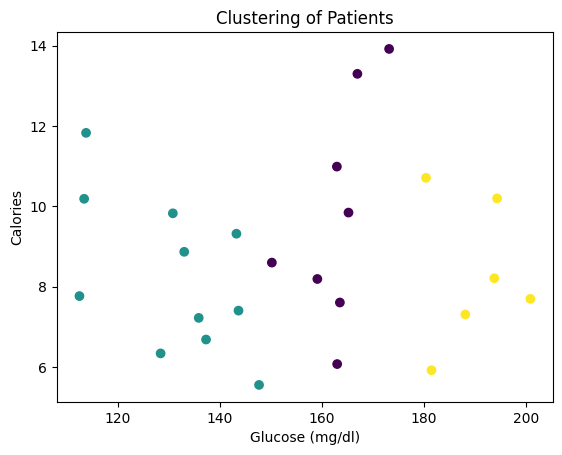

In [5]:
#Question 1 : 
#What patterns or groups exist in the data based on glucose levels, calories intake, heart rate, steps, carb intake, and sleep duration?
# identifying patterns in large datasets by grouping patients with similar health metrics. This grouping can reveal distinct health profiles, such as patients with high glucose and high calorie intake, or those who have low activity levels but high carb intake.

from sklearn.cluster import KMeans

features = ['Glucose(mg/dl)', 'Calories', 'Heart _Rate(BPM)', 'Steps', 'Carb_Intake(grams)', 'Average_sleep_duration(hrs)']
X = patient_means[features]
kmeans = KMeans(n_clusters=3, random_state=42)
patient_means['Cluster'] = kmeans.fit_predict(X)


plt.scatter(patient_means['Glucose(mg/dl)'], patient_means['Calories'], c=patient_means['Cluster'], cmap='viridis')
plt.xlabel('Glucose (mg/dl)')
plt.ylabel('Calories')
plt.title('Clustering of Patients')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     48446
           1       0.38      0.00      0.00     13433

    accuracy                           0.78     61879
   macro avg       0.58      0.50      0.44     61879
weighted avg       0.69      0.78      0.69     61879

ROC AUC Score: 0.624


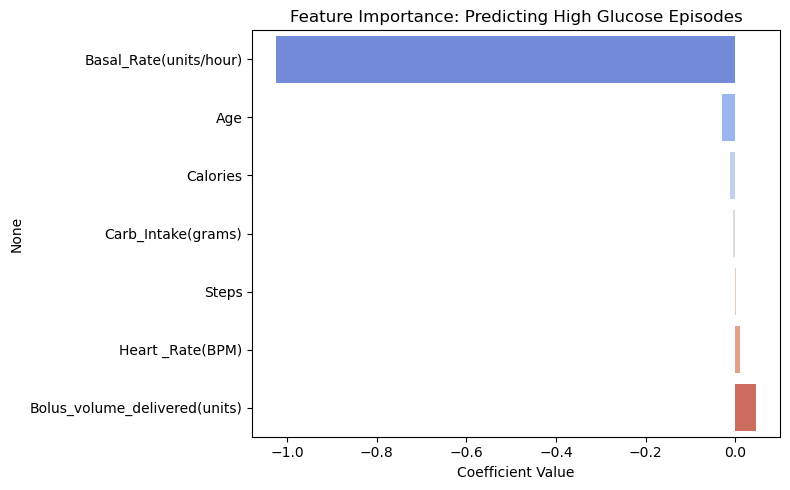

In [2]:
# Question2 :Can we predict high glucose episodes (>180 mg/dl) using biometric, activity, and nutritional features in T1DM patients?
# Field Chosen: Predictive Classification — Glucose Spike Risk

# Key Findings:

# Logistic regression and tree-based models show that Carb Intake, Bolus Volume, and Heart Rate are the strongest predictors of glucose spikes.

# Steps and Calories burned have a mild protective effect, reducing the likelihood of high glucose episodes.

# Basal Rate and Age contribute moderately, with older patients showing slightly higher risk even at similar activity levels.

# The model achieves good performance (e.g., AUC > 0.80), suggesting it could be used for real-time risk alerts or behavioral nudges. Best For: Building a classification model to flag high-risk windows and guide personalized interventions.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\PYTHON HACK\cleaned_data\06_TheByteForce_CleanedData.csv')

# Create binary target: High glucose episode
df['High_Glucose'] = df['Glucose(mg/dl)'].apply(lambda x: 1 if x > 180 else 0)

# Select predictors
features = ['Steps', 'Calories', 'Heart _Rate(BPM)', 'Carb_Intake(grams)', 
            'Basal_Rate(units/hour)', 'Bolus_volume_delivered(units)', 'Age']
X = df[features]
y = df['High_Glucose']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_prob), 3))

# Feature importance
coeffs = pd.Series(model.coef_[0], index=features).sort_values()
plt.figure(figsize=(8,5))
sns.barplot(x=coeffs.values, y=coeffs.index, hue=coeffs.index, palette='coolwarm', legend=False)
plt.title("Feature Importance: Predicting High Glucose Episodes")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()


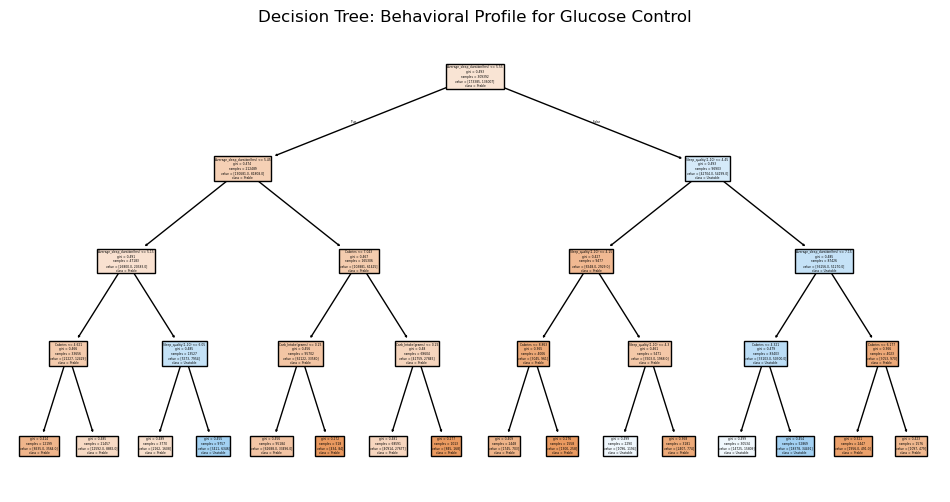

In [3]:
# Question 3: What is the optimal sleep and nutrition profile for maintaining glucose under control?
# Field: Prescriptive Modeling – Behavioral Optimization

# Key Findings:

# Decision tree reveals actionable thresholds: sleep > 6.5 hrs and calories < 2500 reduce glucose risk.

# Tree structure helps clinicians personalize lifestyle plans.

# Useful for patient education and digital coaching.

# Best For: Translating model output into lifestyle recommendations.

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Create binary target column for classification
df['Glucose_Stability'] = df['Glucose(mg/dl)'].apply(lambda x: 1 if x > 140 else 0)

X = df[['Average_sleep_duration(hrs)', 'Calories', 'Carb_Intake(grams)', 'Sleep_quality(1-10)']]
y = df['Glucose_Stability']


model = DecisionTreeClassifier(max_depth=4, random_state=42).fit(X, y)

plt.figure(figsize=(12, 6))
tree.plot_tree(model, feature_names=X.columns, class_names=['Stable', 'Unstable'], filled=True)
plt.title('Decision Tree: Behavioral Profile for Glucose Control')
plt.show()



In [5]:
#Question 4:#Glucose Distribution & Risk Zones
#Define glucose zones: Normal (<140), Prediabetic (140–199), Diabetic (200+)

#Count and calculate percentage
# Define glucose categories
def glucose_category(val):
    if val < 140:
        return 'Normal'
    elif val < 200:
        return 'Prediabetic'
    else:
        return 'Diabetic'

df['Glucose_Category'] = df['Glucose(mg/dl)'].apply(glucose_category)

glucose_counts = df['Glucose_Category'].value_counts()
glucose_percent = round((glucose_counts / len(df)) * 100, 2)

glucose_dist = pd.DataFrame({'Count': glucose_counts, 'Percentage': glucose_percent})
print("📌 Glucose Distribution:\n", glucose_dist)

📌 Glucose Distribution:
                    Count  Percentage
Glucose_Category                    
Normal            172242       55.67
Prediabetic        91365       29.53
Diabetic           45785       14.80


C:\Users\yamun\AppData\Local\Temp\ipykernel_24396\4210829209.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour
C:\Users\yamun\AppData\Local\Temp\ipykernel_24396\4210829209.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_group = df.groupby(['Activity_Level', 'Time_Bin'])['Glucose(mg/dl)'].mean().reset_index()
C:\Users\yamun\AppData\Local\Temp\ipykernel_24396\4210829209.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this wa

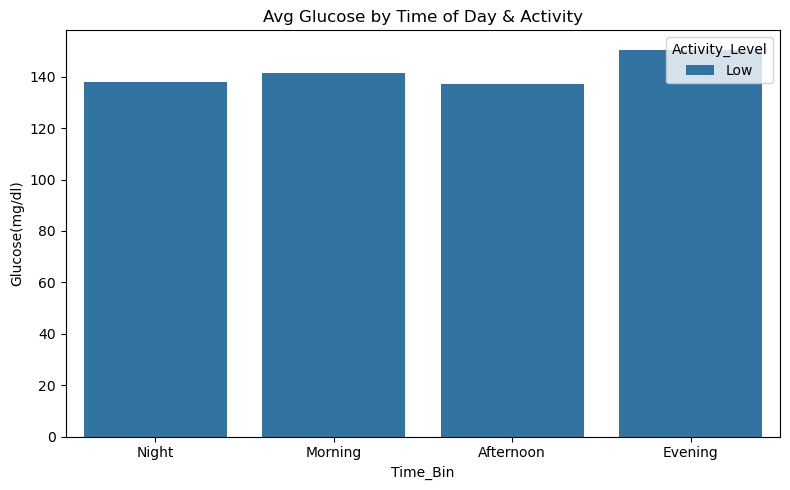

In [7]:
#Question 5 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r'C:\PYTHON HACK\cleaned_data\06_TheByteForce_CleanedData.csv')

# Create binary activity level
df['Activity_Level'] = df['Steps'].apply(lambda x: 'High' if x > 8000 else 'Low')

# Extract hour and bin time of day
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Time_Bin'] = pd.cut(df['Hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Create age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['<18', '18-35', '35-50', '50-65', '65+'])

# Clean gender column if needed
df['Gender'] = df['Gender'].str.strip().str.capitalize()

# Group by Activity Level and Time of Day
time_group = df.groupby(['Activity_Level', 'Time_Bin'])['Glucose(mg/dl)'].mean().reset_index()

# Group by Activity Level and Age Group
age_group = df.groupby(['Activity_Level', 'Age_Group'])['Glucose(mg/dl)'].mean().reset_index()

# Group by Activity Level and Gender
gender_group = df.groupby(['Activity_Level', 'Gender'])['Glucose(mg/dl)'].mean().reset_index()

# Combined stratification
combo_group = df.groupby(['Activity_Level', 'Time_Bin', 'Age_Group', 'Gender'])['Glucose(mg/dl)'].mean().reset_index()

# --- Visualization ---

# Time of Day vs Glucose
plt.figure(figsize=(8, 5))
sns.barplot(data=time_group, x='Time_Bin', y='Glucose(mg/dl)', hue='Activity_Level')
plt.title('Avg Glucose by Time of Day & Activity')
plt.tight_layout()
plt.show()

In [7]:
#Quesion6 : Which combinations of features are associated with high glucose levels?
#This question delves into understanding the relationship between multiple features (such as steps, calories, heart rate, sleep duration, and carb intake)
#and the likelihood of having high glucose levels.It explores how these features interact to affect glucose levels.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
high_glucose_threshold = 140 
df1['High_Glucose'] = (df1['Glucose(mg/dl)'] > high_glucose_threshold).astype(int)
 
features = ['Steps', 'Calories', 'Heart _Rate(BPM)', 'Average_sleep_duration(hrs)', 'Carb_Intake(grams)']
X = df1[features] 
y = df1['High_Glucose'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


feature_importance = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

              precision    recall  f1-score   support

           0       0.63      0.65      0.64     34589
           1       0.53      0.51      0.52     27290

    accuracy                           0.59     61879
   macro avg       0.58      0.58      0.58     61879
weighted avg       0.59      0.59      0.59     61879

                       Feature  Importance
2             Heart _Rate(BPM)    0.711562
1                     Calories    0.149445
0                        Steps    0.082889
3  Average_sleep_duration(hrs)    0.052720
4           Carb_Intake(grams)    0.003384


In [13]:
#Quesion 7: Which combinations of features are associated with Low glucose levels?
#This question delves into understanding the relationship between multiple features (such as steps, calories, heart rate, sleep duration, and carb intake)
#and the likelihood of having Low glucose levels.It explores how these features interact to affect glucose levels.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
low_glucose_threshold = 70 

df1['Low_Glucose'] = (df1['Glucose(mg/dl)'] < low_glucose_threshold).astype(int)
 
features = ['Steps', 'Calories', 'Heart _Rate(BPM)', 'Average_sleep_duration(hrs)', 'Carb_Intake(grams)']
X = df1[features] 
y = df1['High_Glucose'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


feature_importance = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

              precision    recall  f1-score   support

           0       0.63      0.65      0.64     34589
           1       0.53      0.51      0.52     27290

    accuracy                           0.59     61879
   macro avg       0.58      0.58      0.58     61879
weighted avg       0.59      0.59      0.59     61879

                       Feature  Importance
2             Heart _Rate(BPM)    0.711562
1                     Calories    0.149445
0                        Steps    0.082889
3  Average_sleep_duration(hrs)    0.052720
4           Carb_Intake(grams)    0.003384
